In [2]:
from processing_emisiones import process_emisiones
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  object
 9   PRIMA EMITIDA           816498 non-null  object
 10  SUMA ASEGURADA          816498 non-null  object
dtypes: object(11)
memory usage: 68.5+ MB
None
EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD      

In [3]:
df = process_emisiones()

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  object
 9   PRIMA EMITIDA           816498 non-null  object
 10  SUMA ASEGURADA          816498 non-null  object
dtypes: object(11)
memory usage: 68.5+ MB
None
EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD      

In [ ]:
cols = ['NUMERO DE ASEGURADOS', 'PRIMA EMITIDA', 'SUMA ASEGURADA', 'EDAD']

In [11]:
df = pd.get_dummies(df, columns=['SEXO'])
print(df.head())

   EDAD                  COBERTURA PLAN DE LA POLIZA MODALIDAD DE LA POLIZA  \
0    22  Exención de pago de prima         Vitalicio            Tradicional   
1    47              Fallecimiento         Vitalicio            Tradicional   
2    34              Fallecimiento       Dotal Mixto            Tradicional   
3    29              Fallecimiento          Temporal            Tradicional   
4    54              Sobrevivencia       Dotal Mixto            Tradicional   

       MONEDA   ENTIDAD                          FORMA DE VENTA  \
0  Extranjera  Chihuahua                 Agentes Persona Física   
1  Extranjera   Coahuila  Fuerza de Venta Interna o Casa Matriz   
2    Indizada  Querétaro                 Agentes Persona Física   
3    Nacional    Hidalgo                           Telemercadeo   
4  Extranjera     Mexico                    Otra Forma de Venta   

   NUMERO DE ASEGURADOS  PRIMA EMITIDA  SUMA ASEGURADA  SEXO_Femenino  \
0                     1            128           

In [12]:
df.columns


Index(['EDAD', 'COBERTURA', 'PLAN DE LA POLIZA', 'MODALIDAD DE LA POLIZA',
       'MONEDA', 'ENTIDAD ', 'FORMA DE VENTA', 'NUMERO DE ASEGURADOS',
       'PRIMA EMITIDA', 'SUMA ASEGURADA', 'SEXO_Femenino', 'SEXO_Masculino',
       'SEXO_No disponible'],
      dtype='object')

In [6]:
df.describe()

,EDAD,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
count,816498.00,816498.00,816498.00,816498.00
mean,46.01,54.96,220171.79,18867467.12
std,16.77,465.17,3491881.22,116478147.56
min,-1.00,1.00,-14894612.00,0.00
25%,34.00,1.00,452.00,42123.00
50%,46.00,4.00,4928.50,1014291.00
75%,58.00,21.00,42486.00,6978519.25
max,121.00,83202.00,2448270922.00,66326216079.00


In [7]:
stats = df.describe(include='all')
print(stats)
print(df.columns)

            EDAD      COBERTURA PLAN DE LA POLIZA MODALIDAD DE LA POLIZA  \
count  816498.00         816498            816498                 816498   
unique       NaN             15                 7                     11   
top          NaN  Fallecimiento          Temporal            Tradicional   
freq         NaN         213903            400891                 464322   
mean       46.01            NaN               NaN                    NaN   
std        16.77            NaN               NaN                    NaN   
min        -1.00            NaN               NaN                    NaN   
25%        34.00            NaN               NaN                    NaN   
50%        46.00            NaN               NaN                    NaN   
75%        58.00            NaN               NaN                    NaN   
max       121.00            NaN               NaN                    NaN   

          MONEDA          ENTIDAD        SEXO          FORMA DE VENTA  \
count     8164

In [8]:
for col in cols:
    print(f'Estadística descriptiva para la columna "{col}":')
    print(df[col].describe())
    print('\n')

Estadística descriptiva para la columna "NUMERO DE ASEGURADOS":
count   816498.00
mean        54.96
std        465.17
min          1.00
25%          1.00
50%          4.00
75%         21.00
max      83202.00
Name: NUMERO DE ASEGURADOS, dtype: float64


Estadística descriptiva para la columna "PRIMA EMITIDA":
count       816498.00
mean        220171.79
std        3491881.22
min      -14894612.00
25%            452.00
50%           4928.50
75%          42486.00
max     2448270922.00
Name: PRIMA EMITIDA, dtype: float64


Estadística descriptiva para la columna "SUMA ASEGURADA":
count        816498.00
mean       18867467.12
std       116478147.56
min               0.00
25%           42123.00
50%         1014291.00
75%         6978519.25
max     66326216079.00
Name: SUMA ASEGURADA, dtype: float64


Estadística descriptiva para la columna "EDAD":
count   816498.00
mean        46.01
std         16.77
min         -1.00
25%         34.00
50%         46.00
75%         58.00
max        121.00
Nam

In [ ]:
X = df[cols]

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

df['cluster'] = kmeans.labels_
for col in cols:
    plt.figure(figsize=(6,6))
    for i in range(3): 
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data[col], cluster_data['SEXO_Masculino'], label=f'Cluster {i}')
    plt.xlabel(col)
    plt.ylabel('SEXO_Masculino')
    plt.legend()
    plt.show()

In [ ]:
for col in cols:
    plt.figure(figsize=(6,6))
    for i in range(3): 
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data[col], cluster_data['SEXO_Femenino'], label=f'Cluster {i}')
    plt.xlabel(col)
    plt.ylabel('SEXO_Femenino')
    plt.legend()
    plt.show()

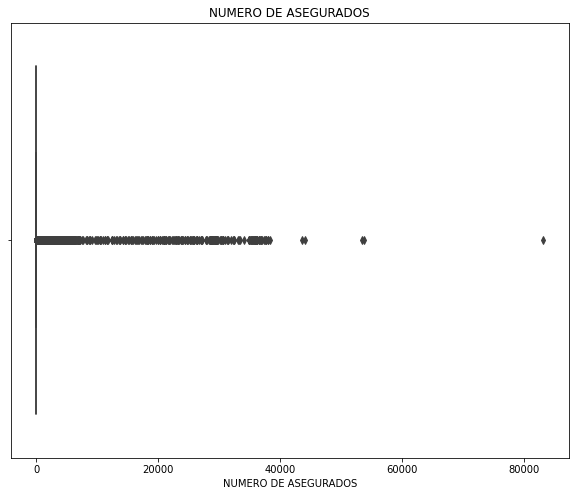

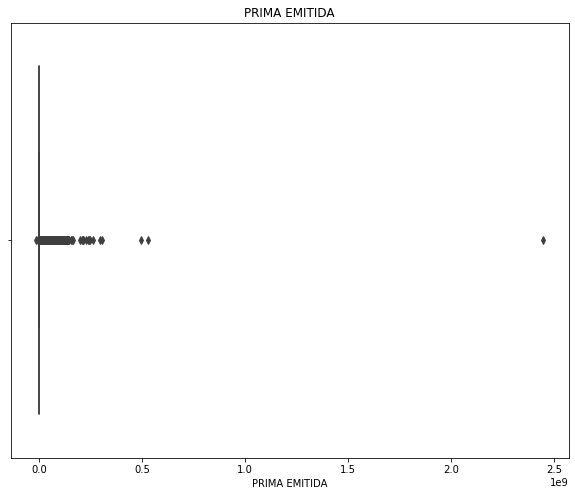

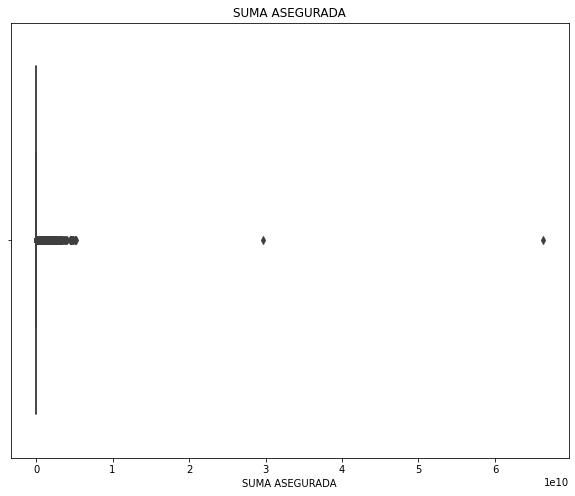

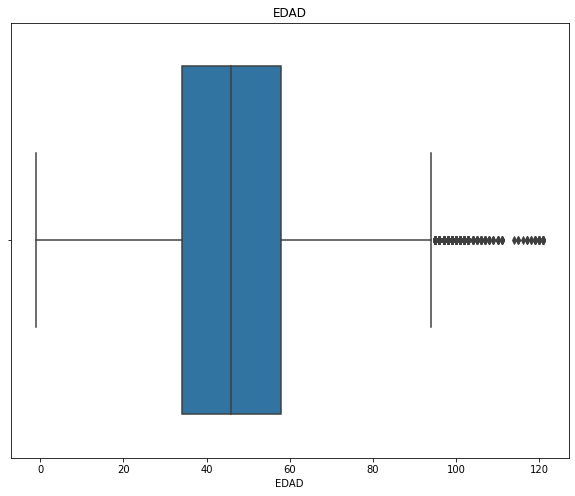

In [10]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    plt.show()